In [1]:
import os
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
from colorama import Fore, Back, Style
root = '/data/wujipeng/ec/model/'
flist = os.listdir(root)
# print('{:6}'.format('model'))
files, pres, recs, f1s, f1_rankings = [], [], [], [], []
filters = ['hcn', 'han']
for folder in flist:
    if folder in filters:
        continue
    if os.path.exists(os.path.join(root, folder, folder + '.stat')):
        stat = json.load(open(os.path.join(root, folder, folder + '.stat')))
        files.append(folder)
        pres.append(stat['pre_all']/len(stat['time_list']))
        recs.append(stat['rec_all']/len(stat['time_list']))
        f1s.append(stat['f1_all']/len(stat['time_list']))
        f1_rankings.append(stat['f1_all_ranking']/len(stat['time_list']))
#         print(folder, len(stat['time_list']))
#         print('pre:        {:.6f}'.format(stat['pre_all']/len(stat['time_list'])))
#         print('rec:        {:.6f}'.format(stat['rec_all']/len(stat['time_list'])))
#         print('\033[31mf1:         {:.6f}'.format(stat['f1_all']/len(stat['time_list'])))
#         print('\033[0mf1_ranking: {:.6f}'.format(stat['f1_all_ranking']/len(stat['time_list'])))
#         print('*'*20)
df = pd.DataFrame(data={'model': files, 'pre': pres, 'rec': recs, 'f1': f1s, 'f1_ranking': f1_rankings})

In [33]:
df.sort_values('f1', inplace=True)
df.reset_index(inplace=True, drop=True)
df[['model', 'pre', 'rec', 'f1', 'f1_ranking']]

,model,pre,rec,f1,f1_ranking
0,han_v3_noft_wv,0.700254,0.627812,0.660920,0.660187
1,han_with_pos_600d_2layer_re,0.750193,0.624064,0.680888,0.688410
2,gru_att,0.689893,0.683251,0.683679,0.708043
3,han_with_pos_600d_2layer_ailab,0.762221,0.627707,0.687923,0.700524
4,han_v3_256d_2layer_re,0.742853,0.670233,0.704104,0.703337
5,han_v3_wiki_32b,0.766104,0.668414,0.713456,0.712258
6,han_v3_noft_wiki,0.761665,0.682203,0.718985,0.720490
7,han_v3_noft_renmin,0.756705,0.691522,0.722099,0.717899
8,han_kw_cat,0.738948,0.710751,0.723695,0.729031
9,han_with_pos_v2,0.811368,0.669767,0.731975,0.766446


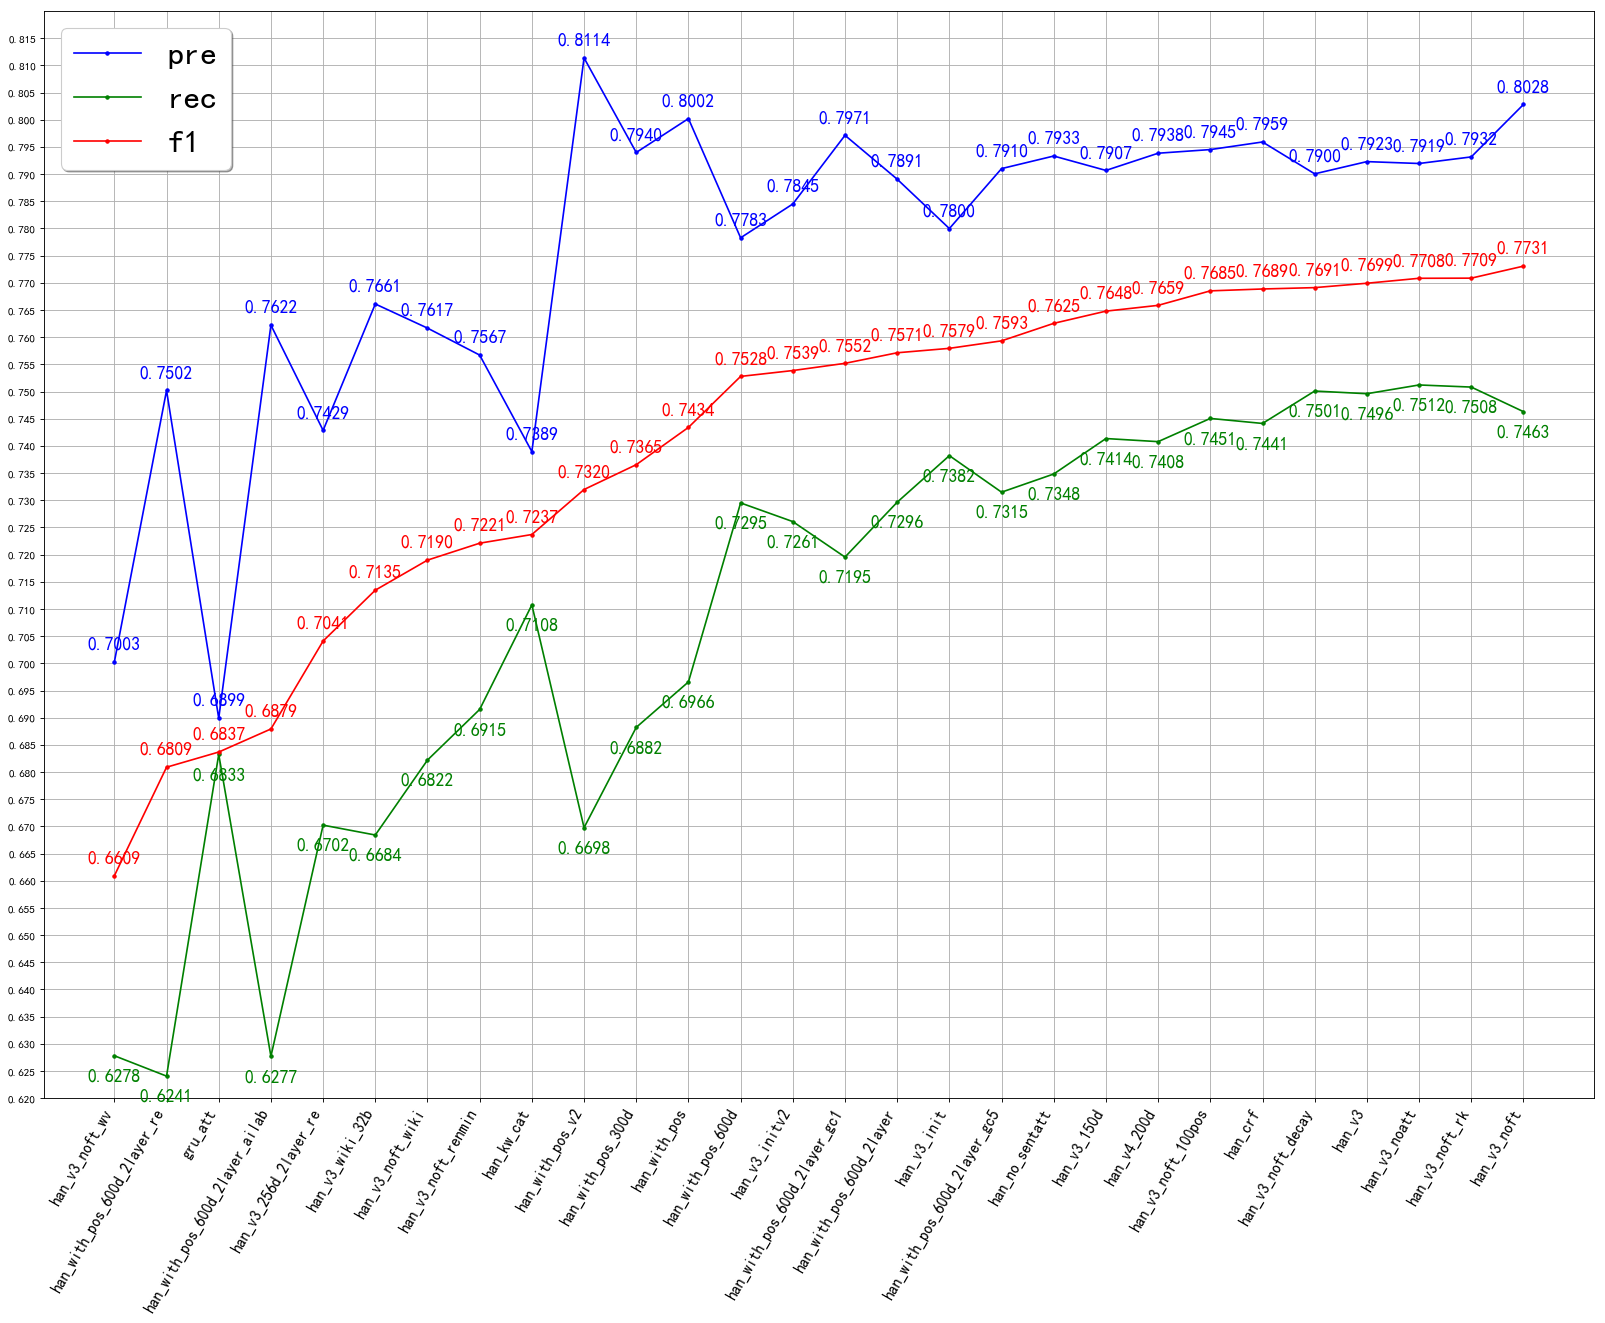

In [34]:
fig, ax = plt.subplots(figsize=(25, 18), dpi=80)
ax.plot(df.index, df.pre, 'b.-')
ax.plot(df.index, df.rec, 'g.-')
ax.plot(df.index, df.f1, 'r.-')
ax.set_xticks(range(len(files)))
ax.set_xticklabels(df.model, rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_ylim(0.62, 0.82)
ax.set_yticks(np.arange(0.62, 0.82, step=0.005))
ax.legend(['pre', 'rec', 'f1'], loc='upper left', shadow=True, fontsize=30)
ax.grid()
for row in df.itertuples():
    ax.text(row.Index, row.pre+0.002, '{:.4f}'.format(row.pre), ha='center', va='bottom', fontsize=16, color='b')
    ax.text(row.Index, row.rec-0.005, '{:.4f}'.format(row.rec), ha='center', va='bottom', fontsize=16, color='g')
    ax.text(row.Index, row.f1+0.002, '{:.4f}'.format(row.f1), ha='center', va='bottom', fontsize=16, color='r')
plt.show()

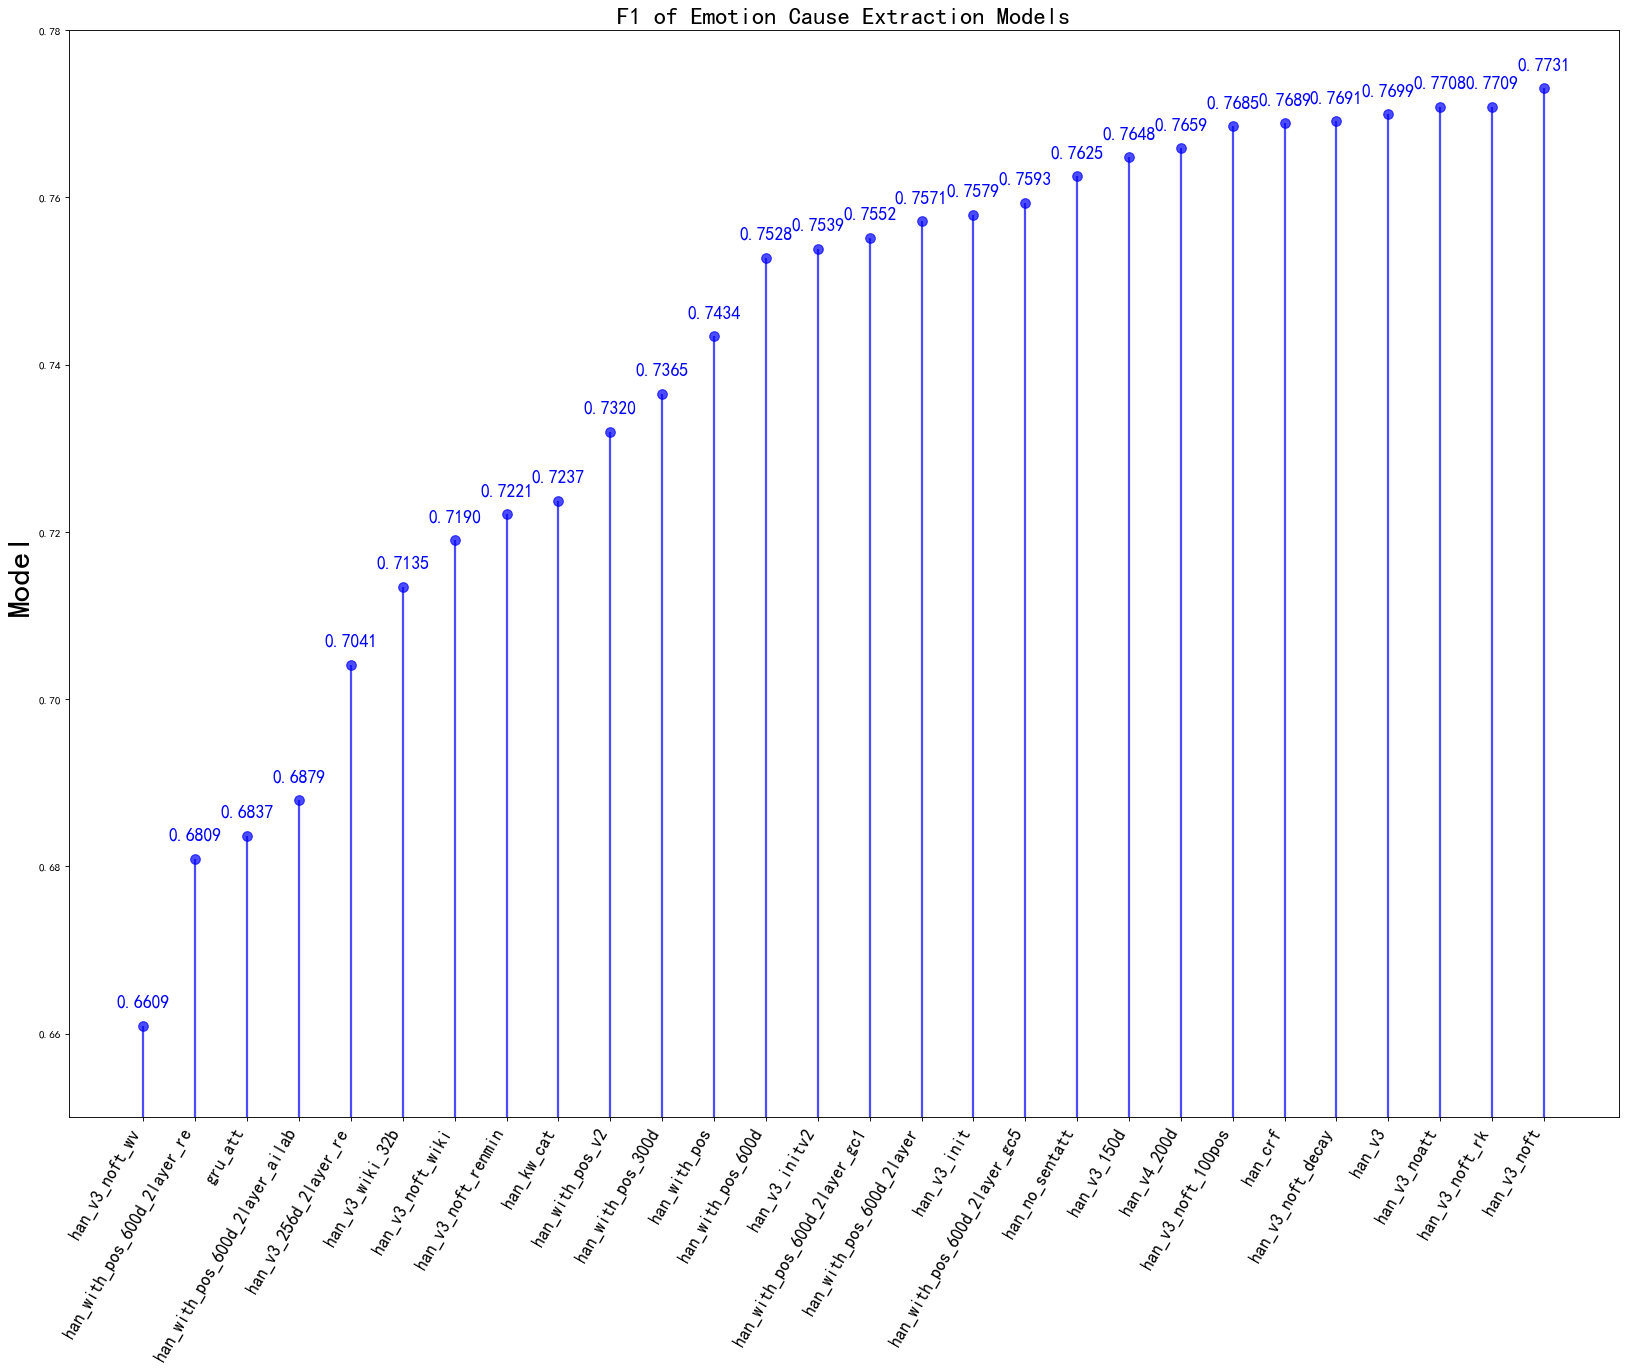

In [35]:
fig, ax = plt.subplots(figsize=(25, 18), dpi=80)
ax.vlines(x=df.index, ymin=0, ymax=df.f1, color='b', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.f1, s=75, color='b', alpha=0.7)
ax.set_title('F1 of Emotion Cause Extraction Models', fontdict={'size':22})
ax.set_ylabel('Model', fontdict={'size':30})
ax.set_xticks(df.index)
ax.set_xticklabels(df.model, rotation=60, fontdict={'horizontalalignment': 'right', 'size':16})
ax.set_ylim(0.65, 0.78)
for row in df.itertuples():
    plt.text(row.Index, row.f1+0.002, '{:.4f}'.format(row.f1), ha='center', va='bottom', fontsize=16, color='b')
plt.show()

In [15]:
from copy import copy
stat = json.load(open('/data/wujipeng/ec/model/han_with_pos_256d_2layer_re/han_with_pos_256d_2layer_re.stat'))
stat1 = copy(stat)

FileNotFoundError: [Errno 2] No such file or directory: '/data/wujipeng/ec/model/han_with_pos_256d_2layer_re/han_with_pos_256d_2layer_re.stat'

In [45]:
for key, value in stat1.items():
    if type(value) == list and value:
        stat1[key] = value[24:]
        stat[key] = value[:24]
for key, value in stat1.items():
    if type(value) != list:
        stat1[key] = sum(stat1[key+'_list'])
        stat[key] = sum(stat[key+'_list'])

In [48]:
json.dump(stat, open('/data/wujipeng/ec/model/han_with_pos_256d_2layer_re/han_with_pos_256d_2layer_re.stat', 'w'), ensure_ascii=False, indent=4)
json.dump(stat1, open('/data/wujipeng/ec/model/han_v3_256d_2layer_re/han_v3_256d_2layer_re.stat', 'w'), ensure_ascii=False, indent=4)

In [ ]:
len(files), len(pres), len(recs)

In [59]:
with open('/data/wujipeng/ec/data/test/val_set.txt') as f:
    val_set = set([int(line.strip().split(',')[0]) for line in f.readlines()])

In [63]:
train_set = set(range(1, 2106)) - val_set

In [67]:
import pickle
pickle.dump((train_set, val_set), open('/home/wujipeng/data_split.pkl', 'wb'))